In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
df = pd.read_csv('Ecommerce Customers.csv')

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
# Drop features that do not relate to yearly amount spent
df = df.drop(['Email', 'Address', 'Avatar'], axis=1)

In [5]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5)
memory usage: 19.6 KB


In [573]:
# convert the dataframe to array to be easier to use in the forloo
#df_x = df.values
# exclude the dependent variable
df_x = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
df_y = df['Yearly Amount Spent']

In [596]:
X_train = np.array(df_x[0:350])
y_train = np.array(df_y[0:350])

In [597]:
X_test = np.array(df_x[350:])
y_test = np.array(df_y[350:])

In [584]:
init_m = 0
init_b = [0 for x in range(regressors)]
learning_rate = 0.0001
num_iteration = 800
N = len(X_train)
regressors = len(X_train[0])
# number of traiing example here is just 1(time on app), so 1/m is just 1

# training set
def minimize_m_b(X_train,y_train,init_m1 , init_b1, learning_rate):
    minimize_m = init_m1
    minimize_b = [x for x in init_b1] 
    # without setting up the values for minimize_b in this way, the values for both will keep adding up
   
    for i in range(N):
        sum_m_b = 0 # forgot to put this and cause the huge numbers for m and b
        
        for j in range(regressors):
            sum_m_b += init_b1[j] * X_train[i][j]
        minimize_m +=  init_m1 + sum_m_b - y_train[i]
        for k in range(regressors):
            minimize_b[k] += (init_m1 + sum_m_b - y_train[i]) * X_train[i][k]
        
    minimized_m = init_m1 - (learning_rate *(1/N) * minimize_m)
    for l in range(regressors):
        minimized_b[l] = init_b1[l] - (learning_rate * (1/N) * minimize_b[l])
    return [minimized_m, minimized_b]


def run_minimize_m_b(X_train,y_train,init_m, init_b, learning_rate, num_iteration):
    init_m1 = init_m
    init_b1 = [x for x in init_b]
    for i in range(num_iteration):
        init_m1,init_b1 = minimize_m_b(X_train,y_train, init_m1, init_b1, learning_rate)
    return [init_m1, init_b1] # the problem for the huge numbers are here, after switch to m1 and b1, the number get smaller

m, b= run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration)
print ("intercept: ",m, "Slope: ",b)       


intercept:  0.155862524555 Slope:  [7.09271002508408, 4.753086626863487, 5.1301772804344301, 5.4296034840892853]


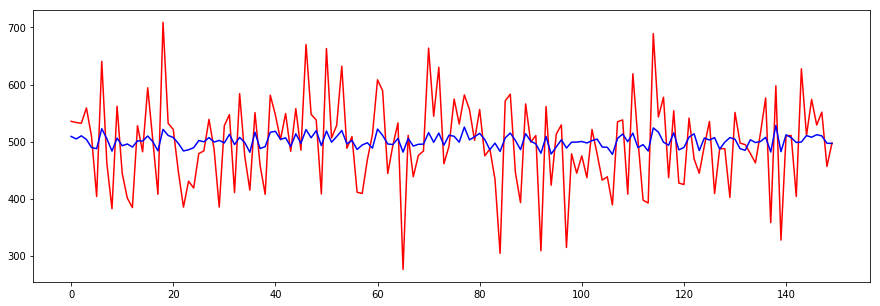

In [585]:
sub_sum=0
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum)
    sub_sum = 0

fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_test, color='red')
a2,=plt.plot(predicted_y, color='blue')

In [586]:
predicted_values = np.array(predicted_y)

Text(0.5,1,'Residual plot')

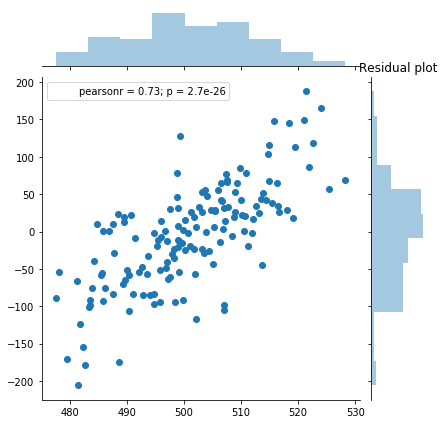

In [587]:
sns.jointplot(predicted_values, y_test - predicted_values )
plt.title('Residual plot')

In [506]:
from sklearn import metrics
total_error = 0.0
for i in range(len(y_test)):
    total_error += (predicted_values[i] - y_test[i])**2
print('Learning rate: ',learning_rate,'  intercept: ', m,'parameters',b)
print('total error: ', total_error)
print('R square: ',metrics.r2_score(y_test, predicted_values))

Learning rate:  0.0001   intercept:  0.155862524555 parameters [7.09271002508408, 4.753086626863487, 5.1301772804344301, 5.4296034840892853]
total error:  730543.492016
R square:  0.201675530196


In [588]:
# Different learning rate


learning_rate = 0.00001
m, b= run_minimize_m_b(X_train,y_train, init_m, init_b, learning_rate, num_iteration)

sub_sum=0
predicted_y=[]
for i in range(len(y_test)):
    for j in range(regressors):
        sub_sum += b[j]*X_test[i][j]
    predicted_y.append(m + sub_sum)
    sub_sum = 0
    
predicted_values = np.array(predicted_y)
    
total_error = 0.0
for i in range(len(y_test)):
    total_error += (predicted_values[i] - y_test[i])**2
print('Learning rate: ',learning_rate,'  intercept: ', m,'parameters',b)
print('total error: ', total_error)
print('R square: ',metrics.r2_score(y_test, predicted_values))

Learning rate:  1e-05   intercept:  0.187364780135 parameters [6.382914721515526, 2.5636847700422973, 6.8817553924756361, 1.1713660412589231]
total error:  833796.613084
R square:  0.0888424216493


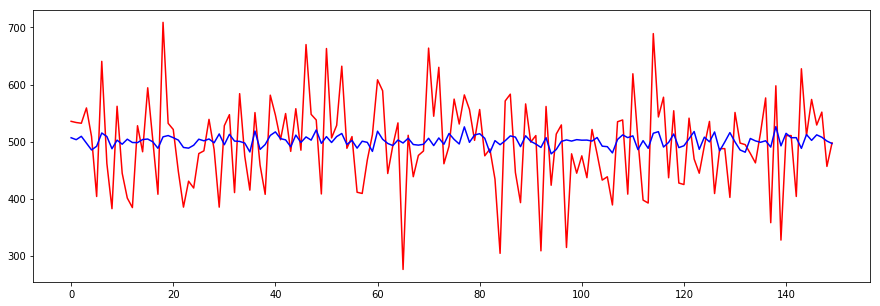

In [589]:
fir, ax = plt.subplots(figsize=(15,5))
a1, =plt.plot(y_test, color='red')
a2,=plt.plot(predicted_y, color='blue')

Text(0.5,1,'Residual plot')

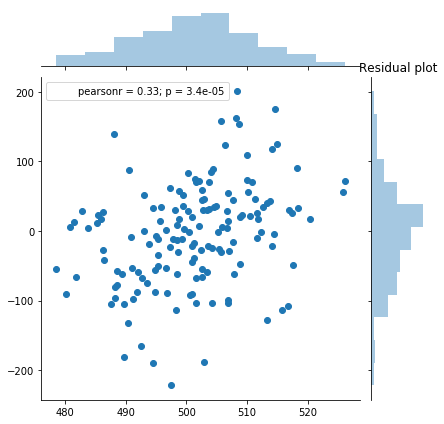

In [590]:
sns.jointplot(predicted_values, y_test - predicted_values )
plt.title('Residual plot')